# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

<i style="color:darkblue;">O propósito deste projeto é analisar os dados de uma empresa de telecomunicações para entender o comportamento dos usuários e a receita gerada pelos diferentes planos e regiões. Pretendo identificar padrões de uso dos serviços de chamadas, mensagens e internet ao longo do tempo, comparar a receita entre os planos "Ultimate" e "Surf" e testar se a receita dos usuários da área de NY-NJ difere da de outras regiões. Essas análises nos ajudarão a identificar oportunidades de otimização dos planos e desenvolver estratégias de marketing para aumentar a receita da empresa.
</i>

## Inicialização

In [1]:
# Carregando todas as bibliotecas

import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare os dados

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<i style="color:darkblue;">O DataFrame `plans` contém informações sobre 2 planos de telecomunicações e possui 8 colunas com diferentes tipos de dados: `int64`, `float64` e `object`, não há dados ausentes neste DataFrame, conforme indicado pelo método `info`, ou seja, os dados no DataFrame `plans` estão bem estruturados, claros e não apresentam problemas imediatos ou necessidade de adequação dos tipos de dados.
</i>

## Corrija os dados

<i style="color:darkblue;">Não haviam problemas a serem corrigidos.
</i>

## Enriqueça os dados

<i style="color:darkblue;">Para esse DataFrame não há nada a acrescentar.</i>

## Usuários

In [5]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprima uma amostra de dados dos usuários

print(users.sample(25))

     user_id  first_name  last_name  age  \
263     1263       Lucio      Duffy   39   
332     1332       Lucas   Saunders   37   
355     1355       Digna      Tyson   57   
468     1468      Johana        Kim   55   
108     1108    Porfirio       Kane   45   
16      1016        Jann    Salinas   30   
414     1414  Georgianne    Herring   30   
200     1200      Delmar      Cross   45   
388     1388         Thu       Noel   75   
357     1357         Ria      Beach   61   
233     1233       Janee    Perkins   33   
114     1114        Esta      Estes   55   
257     1257     Gabriel  O'donnell   61   
342     1342      Eugene     Patton   65   
225     1225   Margarito     Barker   41   
193     1193    Lacresha      Olsen   18   
214     1214        Emil     Robles   34   
490     1490       Shane     Cortez   42   
213     1213        Carl     Newman   47   
250     1250       Milan    Sellers   57   
484     1484      Delpha    Baldwin   46   
314     1314       Brice     Mor

<i style="color:darkblue;">O DataFrame `users` contém informações sobre 500 usuários, com 8 colunas com diferentes tipos de dados: `int64` e `object`. No entanto, a coluna `reg_date` e `churn_date` poderiam ser convertidas para o tipo `datetime` por se tratarem de dados referente a datas, o que facilitaria para futuras análises envolvendo tempo. Existem valores nulos, sendo apenas 34 não nulos, em `churn_date`, o que é esperado, conforme explicado na descrição do projeto, indicando que são usuários que ainda estão usando o serviço na data de corte dos dados. Apesar de parecer bem estruturado, algumas ações de limpeza e pré-processamento podem ser necessárias para facilitar análises futuras.</i>

### Corrija os dados

In [10]:
# Convertendo as colunas 'reg_date' e 'churn_date' para o tipo datetime

users['reg_date'] = pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format= '%Y-%m-%d').fillna('2018-12-31') # Como o projeto trata-se de dados de 2018, preenchi os valores nulos considerando o corte em 31/12/2018, pois isso poderá ser útil em uma manipulação dos dados

print(users.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [11]:
# Calculando a duração do período de utilização para cada usuário

users['plan_duration_days'] = (users['churn_date'] - users['reg_date']).dt.days.astype('int64')

print(users.sample(15))

     user_id  first_name   last_name  age  \
153     1153   Kathaleen    Crawford   30   
279     1279        Neal        Duke   27   
357     1357         Ria       Beach   61   
236     1236       Odell      Juarez   74   
210     1210      Shanae    Carrillo   30   
42      1042  Clementina  Mclaughlin   40   
47      1047         Yuk      French   22   
493     1493      Cicely        Wynn   18   
311     1311     Cherlyn    Saunders   69   
202     1202     Osvaldo       Mayer   36   
77      1077        Chau     Webster   23   
75      1075      Salena       Bates   35   
422     1422  Georgianne        Huff   41   
271     1271      Darrin        Rose   48   
266     1266       Dorie    Chandler   62   

                                                city   reg_date      plan  \
153              Bridgeport-Stamford-Norwalk, CT MSA 2018-06-19      surf   
279                              Baton Rouge, LA MSA 2018-02-05  ultimate   
357                              Baton Rouge, LA

## Chamadas

In [12]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprima uma amostra de dados das chamadas

print(calls)

              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]


<i style="color:darkblue;">O DataFrame `calls` contém informações sobre 137.735 chamadas e possui 4 colunas com diferentes tipos de dados: `int64`, `float64` e `object`. Parecem apropriados para a natureza das informações armazenadas nas colunas, exceto sobre a coluna `call_date` que parece apropriado converter para o tipo de dados `datetime`, pois facilitará a manipulação e análise de datas.</i>

### Corrija os dados

In [14]:
# Convertendo a coluna 'call_date' para o tipo datetime

calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')

print(calls.dtypes)

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object


### Enriqueça os dados

In [15]:
# Criando uma nova coluna para extrair o mês da data da chamada
calls['month'] = calls['call_date'].dt.month

print(calls.head())

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27      8.52     12
1  1000_145     1000 2018-12-27     13.66     12
2  1000_247     1000 2018-12-27     14.48     12
3  1000_309     1000 2018-12-28      5.76     12
4  1000_380     1000 2018-12-30      4.22     12


## Mensagens

In [16]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprima uma amostra dos dados das mensagens

print(messages)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


<i style="color:darkblue;">O DataFrame `messages` contém informações sobre 76.051 mensagens de texto, com 3 colunas como tipo de dados: `int64` e `object`, cada uma representando diferentes atributos das mensagens. Porém é apropriado converter a coluna `message_date` para o tipo `datetime`. Observa-se que as informações fornecidas incluem o identificador único da mensagem, a data da mensagem e a identificação do usuário que enviou a mensagem.
</i>

### Corrija os dados

In [18]:
# Convertendo a coluna 'message_date' para o tipo datetime

messages['message_date'] = pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')

print(messages.dtypes)

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object


### Enriqueça os dados

In [19]:
# Criando uma nova coluna para extrair o mês da data da mensagem
messages['month'] = messages['message_date'].dt.month

print(messages.head())

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


## Internet

In [20]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
#  Imprima uma amostra de dados para o tráfego da internet

print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


<i style="color:darkblue;">O DataFrame `internet` possui 104.825 registros de sessões web e 4 colunas. A coluna `session_date` deve ser convertida para o tipo de dados `datetime` para facilitar a manipulação de datas.</i>

### Corrija os dados

In [22]:
# Convertendo a coluna `session_date` para o tipo datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')

print(internet.dtypes)

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


### Enriqueça os dados

In [23]:
# Criando uma nova coluna para extrair o mês da data dos dados
internet['month'] = internet['session_date'].dt.month

print(internet.head())

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12


## Estude as condições dos planos

[É fundamental entender como os planos funcionam e como são as cobranças dos usuários com base na assinatura. Sugerimos imprimir as informações do plano para visualizar novamente as condições.]

In [24]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [25]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

# Agrupando os dados de chamadas por usuário e por mês, e contando o número de chamadas em cada grupo
calls_per_user_per_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index(name='calls_made')

print(calls_per_user_per_month) # Imprimir o resultado

      user_id  month  calls_made
0        1000     12          16
1        1001      8          27
2        1001      9          49
3        1001     10          65
4        1001     11          64
...       ...    ...         ...
2253     1498     12          39
2254     1499      9          41
2255     1499     10          53
2256     1499     11          45
2257     1499     12          65

[2258 rows x 3 columns]


In [26]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

# Agrupando os dados de chamadas por usuário e por mês, e somando a duração das chamadas em cada grupo
minutes_per_user_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')

print(minutes_per_user_per_month)

      user_id  month  minutes_used
0        1000     12        116.83
1        1001      8        171.14
2        1001      9        297.69
3        1001     10        374.11
4        1001     11        404.59
...       ...    ...           ...
2253     1498     12        324.77
2254     1499      9        330.37
2255     1499     10        363.28
2256     1499     11        288.56
2257     1499     12        468.10

[2258 rows x 3 columns]


In [27]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

# Agrupando os dados de mensagens por usuário e por mês, e contando o número de mensagens em cada grupo
messages_per_user_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='messages_sent')

print(messages_per_user_per_month) # Imprimir o resultado



      user_id  month  messages_sent
0        1000     12             11
1        1001      8             30
2        1001      9             44
3        1001     10             53
4        1001     11             36
...       ...    ...            ...
1801     1496      9             21
1802     1496     10             18
1803     1496     11             13
1804     1496     12             11
1805     1497     12             50

[1806 rows x 3 columns]


In [28]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

# Agrupando os dados de internet por usuário e por mês, e somando o volume de dados em cada grupo
internet_per_user_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index() 

print(internet_per_user_per_month) # Imprimir o resultado

      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


[Coloque os dados agregados em um DataFrame para que um registro nele represente o que um usuário unívoco consumiu em um determinado mês.]

In [29]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

# Combinando os DataFrames de chamadas, minutos, mensagens e internet por usuário e por mês
usage_per_user = calls_per_user_per_month.merge(minutes_per_user_per_month, on=['user_id', 'month'], how='outer')
usage_per_user = usage_per_user.merge(messages_per_user_per_month, on=['user_id', 'month'], how='outer')
usage_per_user = usage_per_user.merge(internet_per_user_per_month, on=['user_id', 'month'], how='outer')

usage_per_user.fillna(0, inplace=True) # Preenchendo valores nulos com zero para indicar que o usuário não realizou nenhuma chamada, não usou minutos, não enviou mensagens ou não utilizou a internet durante esse mês

print(usage_per_user)

      user_id  month  calls_made  minutes_used  messages_sent   mb_used
0        1000     12        16.0        116.83           11.0   1901.47
1        1001      8        27.0        171.14           30.0   6919.15
2        1001      9        49.0        297.69           44.0  13314.82
3        1001     10        65.0        374.11           53.0  22330.49
4        1001     11        64.0        404.59           36.0  18504.30
...       ...    ...         ...           ...            ...       ...
2288     1349     12         0.0          0.00           61.0  13039.91
2289     1361      5         0.0          0.00            2.0   1519.69
2290     1482     10         0.0          0.00            2.0      0.00
2291     1108     12         0.0          0.00            0.0    233.17
2292     1311      6         0.0          0.00            0.0   1498.83

[2293 rows x 6 columns]


In [30]:
# Adicione as informações sobre o plano

usage_per_user = usage_per_user.merge(users[['user_id', 'plan']], on='user_id', how='left') # Mesclar os dados de uso por usuário com as informações do plano

print(usage_per_user) # Imprimir o resultado

      user_id  month  calls_made  minutes_used  messages_sent   mb_used  \
0        1000     12        16.0        116.83           11.0   1901.47   
1        1001      8        27.0        171.14           30.0   6919.15   
2        1001      9        49.0        297.69           44.0  13314.82   
3        1001     10        65.0        374.11           53.0  22330.49   
4        1001     11        64.0        404.59           36.0  18504.30   
...       ...    ...         ...           ...            ...       ...   
2288     1349     12         0.0          0.00           61.0  13039.91   
2289     1361      5         0.0          0.00            2.0   1519.69   
2290     1482     10         0.0          0.00            2.0      0.00   
2291     1108     12         0.0          0.00            0.0    233.17   
2292     1311      6         0.0          0.00            0.0   1498.83   

          plan  
0     ultimate  
1         surf  
2         surf  
3         surf  
4         surf

<i style="color:darkblue;">O DataFrame `calls` contém informações sobre 137.735 chamadas e possui 4 colunas com diferentes tipos de dados: `int64`, `float64` e `object`. Parecem apropriados para a natureza das informações armazenadas nas colunas, exceto sobre a coluna `call_date` que parece apropriado converter para o tipo de dados `datetime`, pois facilitará a manipulação e análise de datas.</i>

In [33]:
# Calcule a receita mensal para cada usuário

# Calcule a receita mensal para cada usuário

def income_calc(row): # Definição da função `income_calc`, que recebe os dados de entrada dos usuários e utiliza esses dados para calcular a receita mensal para cada usuário com base nos planos contratados e no uso adicional de minutos, mensagens e internet
   # Obtendo as informações do plano do usuário
    deal = row['plan']
    deal_info = plans[plans['plan_name'] == deal].iloc[0]

    # Extraindo os limites gratuitos do pacote do plano
    minutes_inc = deal_info['minutes_included']
    messages_inc = deal_info['messages_included']
    mb_inc = deal_info['mb_per_month_included']

    # Obtendo o preço do plano mensal
    usd_monthly = deal_info['usd_monthly_pay']

    # Calcular o uso adicional além dos limites gratuitos
    minutes_exceeded = max(0, row['minutes_used'] - minutes_inc)
    messages_exceeded = max(0, row['messages_sent'] - messages_inc)
    mb_exceeded = max(0, row['mb_used'] - mb_inc)

    # Calcular o valor do uso adicional com base nos preços por minuto, mensagem e GB
    minute_costs = minutes_exceeded * deal_info['usd_per_minute']
    messages_costs = messages_exceeded * deal_info['usd_per_message']
    internet_costs = (mb_exceeded / 1024) * deal_info['usd_per_gb']  # Convertendo MB para GB devido ao preço do excedente ser cobrado por GB

    # Calcular a receita mensal total
    income_month = usd_monthly + minute_costs + messages_costs + internet_costs

    return income_month


usage_per_user['income_month'] = usage_per_user.apply(income_calc, axis=1).round(2) # Calcular a receita mensal para cada usuário e usei o método 'round()' para fixar o número de casas decimais

print(usage_per_user)

      user_id  month  calls_made  minutes_used  messages_sent   mb_used  \
0        1000     12        16.0        116.83           11.0   1901.47   
1        1001      8        27.0        171.14           30.0   6919.15   
2        1001      9        49.0        297.69           44.0  13314.82   
3        1001     10        65.0        374.11           53.0  22330.49   
4        1001     11        64.0        404.59           36.0  18504.30   
...       ...    ...         ...           ...            ...       ...   
2288     1349     12         0.0          0.00           61.0  13039.91   
2289     1361      5         0.0          0.00            2.0   1519.69   
2290     1482     10         0.0          0.00            2.0      0.00   
2291     1108     12         0.0          0.00            0.0    233.17   
2292     1311      6         0.0          0.00            0.0   1498.83   

          plan  income_month  
0     ultimate         70.00  
1         surf         20.00  
2     

## Estude o comportamento do usuário

### Chamadas

<Figure size 720x432 with 0 Axes>

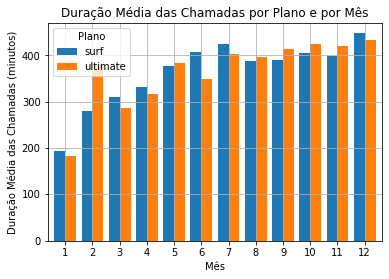

In [38]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.

# Calculando a duração média das chamadas por plano e por mês
avg_call_duration = usage_per_user.pivot_table(index='month', columns='plan', values='minutes_used', aggfunc='mean')

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
avg_call_duration.plot(kind='bar', width=0.8)
plt.title('Duração Média das Chamadas por Plano e por Mês')
plt.xlabel('Mês')
plt.ylabel('Duração Média das Chamadas (minutos)')
plt.legend(title='Plano')
plt.grid(True)
plt.xticks(rotation=1)

plt.show()

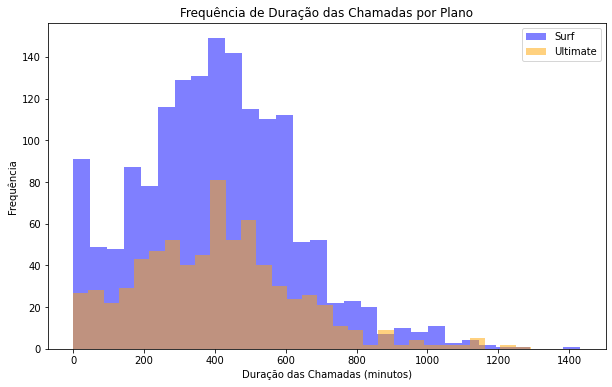

In [39]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.

# Filtrar os dados para cada plano
surf_calls_duration = usage_per_user[usage_per_user['plan'] == 'surf']['minutes_used']
ultimate_calls_duration = usage_per_user[usage_per_user['plan'] == 'ultimate']['minutes_used']

# Criando histograma
plt.figure(figsize=(10, 6))
plt.hist(surf_calls_duration, bins=30, alpha=0.5, label='Surf', color='blue') # Plotar o histograma para o plano Surf
plt.hist(ultimate_calls_duration, bins=30, alpha=0.5, label='Ultimate', color='orange') # Plotar o histograma para o plano Ultimate
plt.title('Frequência de Duração das Chamadas por Plano')
plt.xlabel('Duração das Chamadas (minutos)')
plt.ylabel('Frequência')
plt.legend()

plt.show()

In [40]:
# Calcule a média e a variação da duração mensal das chamadas

# Calculando a média da duração das chamadas por plano
surf_mean_duration = surf_calls_duration.mean()
ultimate_mean_duration = ultimate_calls_duration.mean()

# Calculando a variância da duração das chamadas por plano
surf_var_duration = surf_calls_duration.var()
ultimate_var_duration = ultimate_calls_duration.var()

print("Média da duração das chamadas:")
print("Plano Surf:", surf_mean_duration)
print("Plano Ultimate:", ultimate_mean_duration)

print("\nVariância da duração das chamadas:")
print("Plano Surf:", surf_var_duration)
print("Plano Ultimate:", ultimate_var_duration)

Média da duração das chamadas:
Plano Surf: 404.76239033693577
Plano Ultimate: 406.19308333333333

Variância da duração das chamadas:
Plano Surf: 49135.10489072031
Plano Ultimate: 51640.97140216272


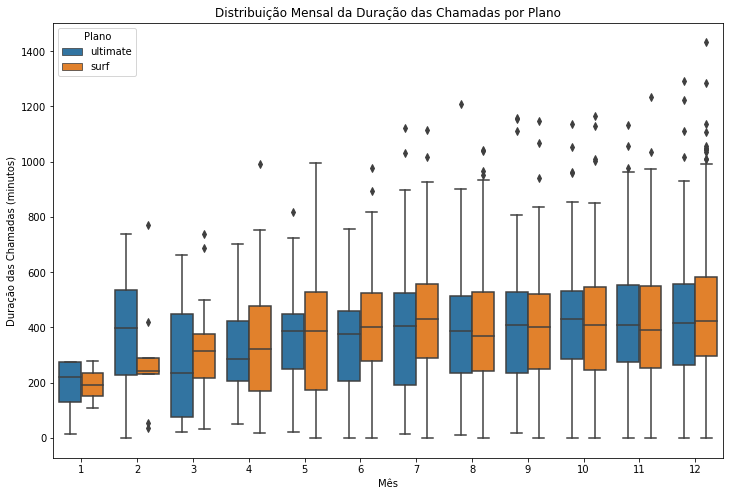

In [41]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

# Plotar o boxplot da duração das chamadas por plano
plt.figure(figsize=(12, 8))
sns.boxplot(x='month', y='minutes_used', hue='plan', data=usage_per_user)
plt.title('Distribuição Mensal da Duração das Chamadas por Plano')
plt.xlabel('Mês')
plt.ylabel('Duração das Chamadas (minutos)')
plt.legend(title='Plano')
plt.xticks(rotation=1)
plt.show()

<i style="color:darkblue;">Observa-se que a média da duração das chamadas para o plano Surf é de aproximadamente 404.76 minutos por mês, enquanto para o plano Ultimate é de aproximadamente 406.19 minutos por mês. Isso sugere que, em média, os usuários do plano Ultimate tendem a fazer chamadas ligeiramente mais longas. Quanto a variância da duração das chamadas, indica o quão dispersos estão os dados em torno da média, a variância é relativamente alta, indicando uma ampla dispersão nos dados em ambos os grupos. Não há uma diferença clara entre os dois planos em termos de uso mensal de minutos. Em termos de duração das chamadas, não há uma diferença substancial entre os usuários dos planos Surf e Ultimate. Ambos os grupos de usuários exibem comportamentos semelhantes em relação ao tempo gasto em chamadas mensais.</i>

### Mensagens

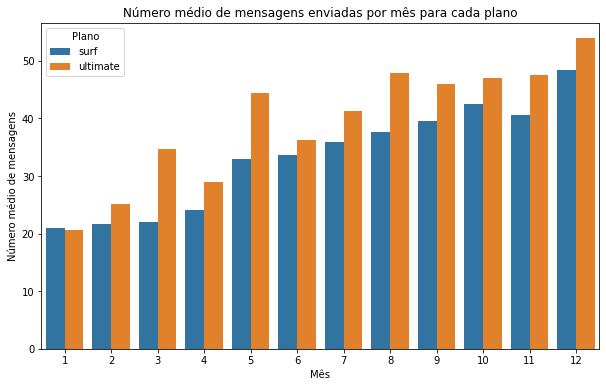

In [42]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

# Mesclar os dados de mensagens com os dados de usuários para obter os planos de cada usuário
messages_with_plan = messages_per_user_per_month.merge(users[['user_id', 'plan']], on='user_id')

# Agrupar os dados por plano e mês e calcular a média e a variância
messages_grouped = messages_with_plan.groupby(['plan', 'month']).agg({'messages_sent': ['mean', 'var']}).reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=messages_grouped, x='month', y=('messages_sent', 'mean'), hue='plan')
plt.title('Número médio de mensagens enviadas por mês para cada plano')
plt.xlabel('Mês')
plt.ylabel('Número médio de mensagens')
plt.legend(title='Plano')

plt.show()

<i style="color:darkblue;">Ambos os planos apresentam um aumento no uso de mensagens ao longo do ano. No entanto, o plano Surf parece ter uma média de mensagens um pouco maior em comparação com o plano Ultimate. Isso sugere que os usuários do plano Surf podem estar mais engajados em enviar mensagens em comparação com os usuários do plano Ultimate.</i>

### Internet

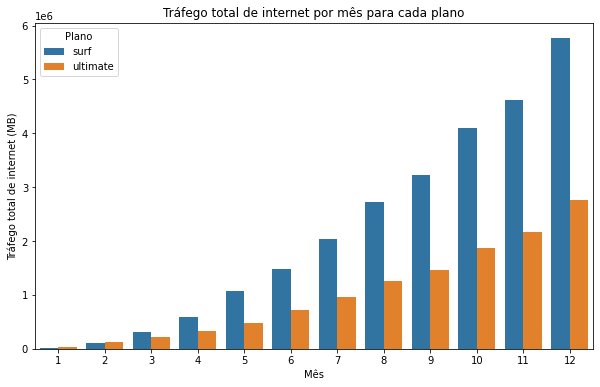

In [43]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

# Mesclar os dados de uso da internet com os dados de usuários para obter os planos de cada usuário
internet_with_plan = internet_per_user_per_month.merge(users[['user_id', 'plan']], on='user_id')

# Calcular o tráfego total de internet por plano e mês
internet_traffic = internet_with_plan.groupby(['plan', 'month'])['mb_used'].sum().reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=internet_traffic, x='month', y='mb_used', hue='plan')
plt.title('Tráfego total de internet por mês para cada plano')
plt.xlabel('Mês')
plt.ylabel('Tráfego total de internet (MB)')
plt.legend(title='Plano')

plt.show()

<i style="color:darkblue;">Embora haja variações mensais no consumo de tráfego de internet, ambas as categorias de plano (Surf e Ultimate) mostram uma tendência geral de aumento ao longo do ano. Não parece haver diferenças significativas no comportamento de consumo de internet entre os dois planos. Ambos os tipos de usuários tendem a aumentar seu consumo de internet com o tempo, possivelmente devido a uma variedade de fatores, como aumento da dependência da internet para comunicação, entretenimento e trabalho.</i>

## Receita

In [44]:
# Separar as receitas por plano
surf_income = usage_per_user[usage_per_user['plan'] == 'surf']['income_month']
ultimate_income = usage_per_user[usage_per_user['plan'] == 'ultimate']['income_month']

# Descrever estatisticamente as receitas para o plano Surf
print("Estatísticas de receita para o plano Surf:")
print(surf_income.describe())

# Descrever estatisticamente as receitas para o plano Ultimate
print("\nEstatísticas de receita para o plano Ultimate:")
print(ultimate_income.describe())

Estatísticas de receita para o plano Surf:
count    1573.000000
mean       57.293757
std        53.735931
min        20.000000
25%        20.000000
50%        36.680000
75%        76.850000
max       581.330000
Name: income_month, dtype: float64

Estatísticas de receita para o plano Ultimate:
count    720.000000
mean      72.116069
std       10.768846
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      178.520000
Name: income_month, dtype: float64


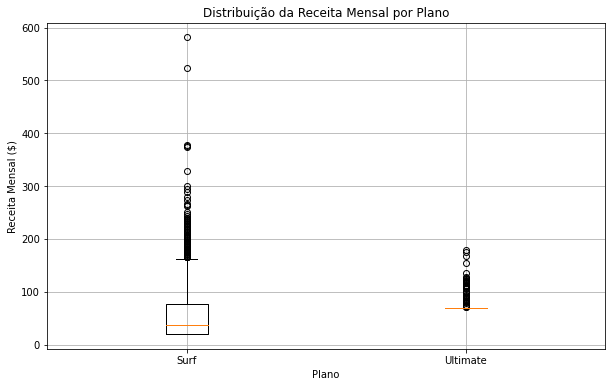

In [45]:
# Dados das receitas por plano
surf_revenue = usage_per_user[usage_per_user['plan'] == 'surf']['income_month']
ultimate_revenue = usage_per_user[usage_per_user['plan'] == 'ultimate']['income_month']

# Criar o diagrama de caixa
plt.figure(figsize=(10, 6))
plt.boxplot([surf_revenue, ultimate_revenue], labels=['Surf', 'Ultimate'])
plt.title('Distribuição da Receita Mensal por Plano')
plt.xlabel('Plano')
plt.ylabel('Receita Mensal ($)')
plt.grid(True)
plt.show()

<i style="color:darkblue;">Para cada plano, extraímos o seguinte:

**Plano Surf:**
* Contagem (count): 1.573 assinantes
* Receita média (mean): $57.29
* Desvio padrão (std): $53.74
* Receita mínima (min): $20.00
* Primeiro quartil (25%): $20.00
* Mediana (50%): $36.68
* Terceiro quartil (75%): $76.85
* Receita máxima (max): $581.33

**Plano Ultimate:**
* Contagem (count): 720 assinantes
* Receita média (mean): $72.12
* Desvio padrão (std): $10.77
* Receita mínima (min): $70.00
* Primeiro quartil (25%): $70.00
* Mediana (50%): $70.00
* Terceiro quartil (75%): $70.00
* Receita máxima (max): $178.52

O plano Ultimate tem uma média de receita mensal ligeiramente maior do que o plano Surf, o que significa que os assinantes do plano Ultimate tendem a gerar mais receita para a Megaline. A variabilidade da receita mensal é maior no plano Surf em comparação com o plano Ultimate e isso pode ser atribuído à maior flexibilidade de uso dentro do plano Surf, resultando em uma variedade mais ampla de comportamentos de consumo. O plano Surf há uma proporção maior de usuários que geram receita substancialmente maior do que a média devido ao uso adicional de minutos, mensagens e internet. Observa-se que a maioria das receitas do plano Ultimate está agrupada em torno de um valor fixo mensal, enquanto no plano Surf há uma maior variação de receitas devido ao uso adicional, o que significa que os usuários do plano Ultimate tendem a aderir mais aos limites do pacote e, portanto, geram uma receita mais estável para a Megaline. Embora o plano Ultimate tenha uma média de receita mensal ligeiramente maior, o plano Surf apresenta uma maior variabilidade de receita, com uma proporção significativa de usuários gerando receita adicional devido ao uso excedente de serviços.</i>

## Teste hipóteses estatísticas

In [46]:
# Teste as hipóteses

# Criando séries de dados para a receita mensal dos usuários dos planos "Surf" e "Ultimate"
surf_revenue = usage_per_user[usage_per_user['plan'] == 'surf']['income_month']
ultimate_revenue = usage_per_user[usage_per_user['plan'] == 'ultimate']['income_month']

# Realizando o teste t independente usando o alias correto
t_st, p_value = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Imprimir o valor-p
print(f'T-statistic: {t_st}, P-value: {p_value}')

# Decisão sobre a hipótese nula
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: as receitas médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa nas receitas médias.")

T-statistic: -10.489449407570955, P-value: 4.8817076447392475e-25
Rejeitamos a hipótese nula: as receitas médias são diferentes.


<i style="color:darkblue;">As hipóteses nula e alternativa são formuladas da seguinte maneira:

1. **Hipótese Nula (H0):** Não há diferença significativa nas receitas médias entre os usuários dos planos Ultimate e Surf.
2. **Hipótese Alternativa (H1):** Há diferença significativa nas receitas médias entre os usuários dos planos Ultimate e Surf.
    
O teste estatístico utilizado foi o teste t independente, pois estamos comparando as médias de duas amostras independentes (receitas dos usuários dos planos Ultimate e Surf). Optamos por este teste porque estamos interessados em determinar se há uma diferença significativa entre as médias das duas amostras. Além disso, escolhemos um nível de significância (alfa) de 0.05 para tomar a decisão sobre a hipótese nula.

Se o valor-p resultante do teste for menor que o valor alfa (0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas receitas médias entre os dois grupos de usuários. Caso contrário, se o valor-p for maior que alfa, não rejeitamos a hipótese nula e concluímos que não há evidência suficiente para afirmar que as receitas médias são diferentes entre os usuários dos planos Ultimate e Surf.</i>

In [47]:
# Teste as hipóteses

# Incluindo coluna 'city'
usage_with_city = pd.merge(usage_per_user, users[['user_id', 'city']], on='user_id', how='left')

# Separação das receitas baseadas na localização dos usuários
ny_nj_revenue = usage_with_city[usage_with_city['city'].str.contains("NY-NJ")]['income_month']
other_revenue = usage_with_city[~usage_with_city['city'].str.contains("NY-NJ")]['income_month']

# Realização do teste t para amostras independentes
t_st, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Impressão do resultado do teste
print(f'T-statistic: {t_st}, P-value: {p_value}')

# Decisão sobre a hipótese nula com alfa = 0.05
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: existe uma diferença significativa na receita média.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa na receita média.")

T-statistic: -2.3600620723465626, P-value: 0.01860983364199048
Rejeitamos a hipótese nula: existe uma diferença significativa na receita média.


<i style="color:darkblue;">As hipóteses nula e alternativa são formuladas da seguinte maneira:

1. **Hipótese Nula (H0):** A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários das outras regiões.
2. **Hipótese Alternativa (H1):** A receita média dos usuários da área de NY-NJ difere da receita média dos usuários das outras regiões.
    
Utilizamos o teste t para amostras independentes, pois estamos comparando as médias de duas amostras independentes (receitas dos usuários de NY-NJ e receitas dos usuários de outras regiões). Escolhemos um nível de significância (alfa) de 0.05 para tomar a decisão sobre a hipótese nula.

Se o valor-p resultante do teste for menor que o valor alfa (0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa na receita média entre os usuários da área de NY-NJ e os usuários das outras regiões. Caso contrário, se o valor-p for maior que alfa, não rejeitamos a hipótese nula e concluímos que não há evidência suficiente para afirmar que a receita média difere entre os dois grupos de usuários.</i>

## Conclusão geral


1. **Comportamento do usuário:**
* Observamos variações significativas no uso de chamadas, mensagens e internet ao longo dos meses do ano.
* Os usuários do plano "Surf" tendem a enviar mais mensagens e usar mais internet do que os usuários do plano "Ultimate", enquanto os usuários do plano "Ultimate" tendem a fazer mais chamadas.

2. **Receita dos planos:**
* Calculamos a receita mensal para cada usuário com base nos planos contratados e no uso adicional de minutos, mensagens e internet. Observamos uma variação nas receitas, com alguns usuários excedendo os limites de seus planos e pagando por serviços adicionais.
* As estatísticas descritivas das receitas mostraram que a média de receita mensal para o plano "Surf" é de aproximadamente $57.29, com um desvio padrão de $53.74, enquanto para o plano "Ultimate" a média é de $72.12, com um desvio padrão de $10.77.

3. **Análise de região:**
* Podemos concluir que há uma diferença significativa na receita média entre os usuários da área de NY-NJ e os das demais regiões. Isso sugere que os padrões de uso e gastos dos usuários da área de NY-NJ podem ser distintos daqueles de outras regiões. Essa diferença na receita pode ser influenciada por uma variedade de fatores, como hábitos de comunicação, preferências de consumo de dados, densidade populacional, perfil socioeconômico ou até mesmo diferenças culturais.

4. **Comparação entre planos:**
* Ao testar a hipótese de que as receitas médias dos usuários dos planos de chamadas "Ultimate" e "Surf" são diferentes, rejeitamos a hipótese nula, indicando que há uma diferença significativa entre as receitas médias desses dois planos.

5. **Considerações finais:**
* As análises realizadas forneceram insights valiosos sobre o comportamento dos usuários e as diferenças nas receitas entre os planos e regiões.
* Com base nas conclusões, estratégias de marketing e ajustes nos planos podem ser considerados para melhor atender às necessidades dos clientes e maximizar a receita da empresa.